# Text Classification

Text classification is one of the most common tasks in NLP; it can be used for a broad range of applications, such as tagging customer feedback into categories or routing support tickets according to their language. Chances are that your email program’s spam filter is using text classification to protect your inbox from a deluge of unwanted junk!

In [ ]:
!pip3 install datasets transformers matplotlib torch

In [ ]:
!pip3 install --upgrade nbformat

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [45]:
import torch
import torch.nn.functional as F

In [70]:
from transformers import pipeline, AutoTokenizer, DistilBertTokenizer, TFAutoModel
from datasets import list_datasets, load_dataset

In [6]:
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 12785 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [7]:
emotions = load_dataset("emotion")

Dataset emotion downloaded and prepared to /Users/svngoku/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 873.15it/s]


In [8]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [10]:
len(train_ds)

16000

In [11]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [12]:
train_ds.column_names

['text', 'label']

In [13]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [14]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [15]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


## Use case

In [16]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {dataset_url}

--2022-10-30 01:15:00--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Résolution de www.dropbox.com (www.dropbox.com)… 2620:100:6023:18::a27d:4312, 162.125.67.18
Connexion à www.dropbox.com (www.dropbox.com)|2620:100:6023:18::a27d:4312|:443… connecté.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : /s/raw/1pzkadrvffbqw6o/train.txt [suivant]
--2022-10-30 01:15:01--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Réutilisation de la connexion existante à [www.dropbox.com]:443.
requête HTTP transmise, en attente de la réponse… 302 Found
Emplacement : https://uc65afbb4ce64396de1c7fc70820.dl.dropboxusercontent.com/cd/0/inline/Bvx7_TymV9zA85G2s55yQ7XwoYdN12qdklLQoHh18Jo48b7Iow3QlaQkjdyeLFwImy1E8iaByScA5NzSXKBOC-2KN8NP8PtKCD1bLG4KYYHZv8JrSBlz_Wd4q_AmjW0BMqPyeDiZxeNNKT1Uh0QtwPb1H6SZ2y2EeB8cOiYeaq-xNg/file# [suivant]
--2022-10-30 01:15:02--  https://uc65afbb4ce64396de1c7fc70820.dl.dropboxusercontent.com/cd/0/inline/Bvx7_TymV9zA85G2s55yQ7XwoYdN12qdklLQoH

In [17]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


In [18]:
emotions_local = load_dataset("csv", data_files="train.txt", sep=";",names=["text", "label"])

Using custom data configuration default-0c17f5f09683cf2e


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 282.33it/s]


Dataset csv downloaded and prepared to /Users/svngoku/.cache/huggingface/datasets/csv/default-0c17f5f09683cf2e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 220.69it/s]


In [19]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [20]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


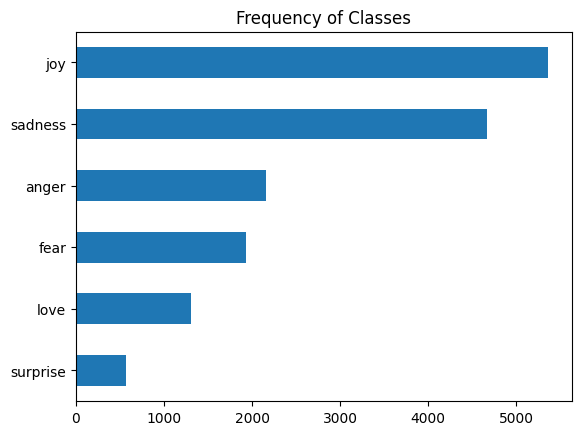

In [36]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

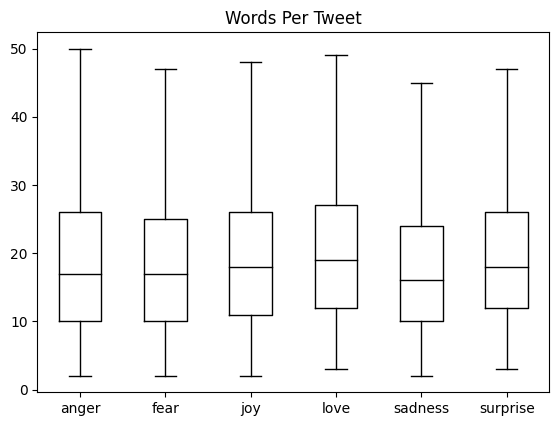

In [37]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [38]:
emotions.reset_format()

## From Text to Tokens
Transformer models like DistilBERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical vectors. Tokenization is the step of breaking down a string into the atomic units used in the model. There are several tokenization strategies one can adopt, and the optimal splitting of words into subunits is usually learned from the corpus. Before looking at the tokenizer used for DistilBERT, let’s consider two extreme cases: character and word tokenization.

### Character Tokenization
The simplest tokenization scheme is to feed each character individually to the model. In Python, str objects are really arrays under the hood, which allows us to quickly implement character-level tokenization with just one line of code:

In [39]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [40]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [41]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [42]:
categorical_df = pd.DataFrame(
    {
        "Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]
    }
)

categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [43]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [46]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [47]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Word Tokenization
Instead of splitting the text into characters, we can split it into words and map each word to an integer. Using words from the outset enables the model to skip the step of learning words from characters, and thereby reduces the complexity of the training process.

One simple class of word tokenizers uses whitespace to tokenize the text. We can do this by applying Python’s split() function directly on the raw text (just like we did to measure the tweet lengths):

In [48]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### Subword Tokenization
The basic idea behind subword tokenization is to combine the best aspects of character and word tokenization. On the one hand, we want to split rare words into smaller units to allow the model to deal with complex words and misspellings. On the other hand, we want to keep frequent words as unique entities so that we can keep the length of our inputs to a manageable size. The main distinguishing feature of subword tokenization (as well as word tokenization) is that it is learned from the pretraining corpus using a mix of statistical rules and algorithms.

There are several subword tokenization algorithms that are commonly used in NLP, but let’s start with WordPiece,5 which is used by the BERT and DistilBERT tokenizers. The easiest way to understand how WordPiece works is to see it in action. nlpt_pin01 Transformers provides a convenient AutoTokenizer class that allows you to quickly load the tokenizer associated with a pretrained model—we just call its from_pretrained() method, providing the ID of a model on the Hub or a local file path. Let’s start by loading the tokenizer for DistilBERT:

In [50]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 21.1kB/s]
Downloading: 100%|██████████| 483/483 [00:00<00:00, 401kB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 781kB/s] 
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 781kB/s] 


In [52]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [53]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [54]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [55]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [56]:
# The AutoTokenizer class also has several attributes that provide information about the tokenizer. For example, we can inspect the vocabulary size:
tokenizer.vocab_size

30522

In [57]:
# The corresponding model’s maximum context size
tokenizer.model_max_length

512

In [58]:
# Attribute to know about is the names of the fields that the model expects in its forward pass
tokenizer.model_input_names

['input_ids', 'attention_mask']

### Tokenizing the Whole Dataset
To tokenize the whole corpus, we’ll use the map() method of our DatasetDict object. We’ll encounter this method many times throughout this book, as it provides a convenient way to apply a processing function to each element in a dataset. As we’ll soon see, the map() method can also be used to create new rows and columns.

In [59]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [60]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [61]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]


In [62]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Training a Text Classifier
Models like DistilBERT are pretrained to predict masked words in a sequence of text. However, we can’t use these language models directly for text classification; we need to modify them slightly. To understand what modifications are necessary, let’s take a look at the architecture of an encoder-based model like DistilBERT

The text is tokenized and represented as one-hot vectors called token encodings. The size of the tokenizer vocabulary determines the dimension of the token encodings, and it usually consists of 20k–200k unique tokens. Next, these token encodings are converted to token embeddings, which are vectors living in a lower-dimensional space. The token embeddings are then passed through the encoder block layers to yield a hidden state for each input token. For the pretraining objective of language modeling,⁠6 each hidden state is fed to a layer that predicts the masked input tokens. For the classification task, we replace the language modeling layer with a classification layer.

In practice, PyTorch skips the step of creating one-hot vectors for token encodings because multiplying a matrix with a one-hot vector is the same as selecting a column from the matrix. This can be done directly by getting the column with the token ID from the matrix. 

We have two options to train such a model on our Twitter dataset:

- Feature extraction
    We use the hidden states as features and just train a classifier on them, without modifying the pretrained model.

- Fine-tuning
    We train the whole model end-to-end, which also updates the parameters of the pretrained model.

We will explore both options for DistilBERT and examine their trade-offs.

### Transformers as Feature Extractors
Using a transformer as a feature extractor is fairly simple.  We freeze the body’s weights during training and use the hidden states as features for the classifier. 
The advantage of this approach is that we can quickly train a small or shallow model. Such a model could be a neural classification layer or a method that does not rely on gradients, such as a random forest. This method is especially convenient if GPUs are unavailable, since the hidden states only need to be precomputed once.

### Using pretrained models
We will use another convenient auto class from Transformers called `AutoModel`. Similar to the `AutoTokenizer` class, `AutoModel` has a `from_pretrained()` method to load the weights of a pretrained model. Let’s use this method to load the DistilBERT checkpoint:

In [71]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tf_model = TFAutoModel.from_pretrained(model_ckpt)
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)


Downloading: 100%|██████████| 363M/363M [07:55<00:00, 764kB/s]  
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_projector', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Downloa

### Extracting the last hidden states
To warm up, let’s retrieve the last hidden states for a single string. The first thing we need to do is encode the string and convert the tokens to PyTorch tensors. This can be done by providing the `return_tensors="pt"` argument to the tokenizer as follows:

In [ ]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

In [ ]:
# inputs = {k:v.to(device) for k,v in inputs.items()}
# with torch.no_grad():
#     outputs = model(**inputs)
# print(outputs)